#결과

- CIFAR10 image classification dataset을 deep network 의 accuracy : 0.5763
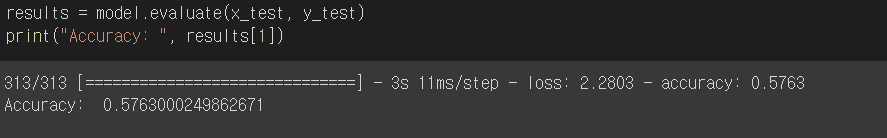
- Batch normalization 을 사용하여 개선했을 때 accuracy : 0.5708
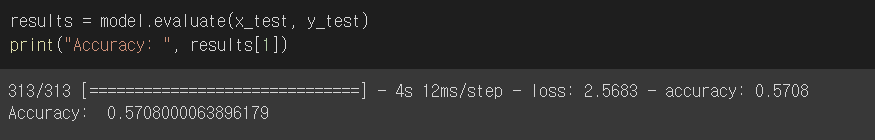

- Dropout 을 사용하여 개선했을 때 accuracy : 0.4512
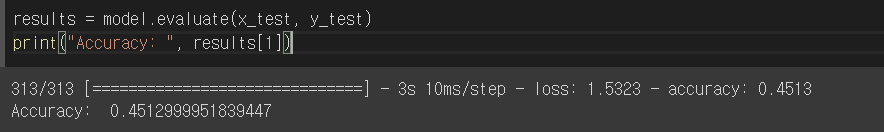
- NIN 을 사용하여 개선했을 때 accuracy : 0.6033
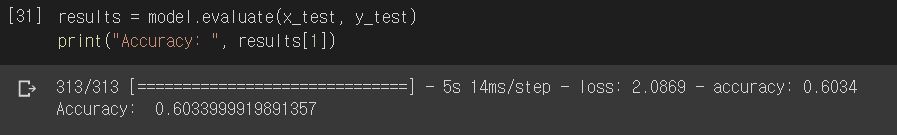
MIN을 사용한 결과가 가장 accuracy가 높게 나왔음을 확인했다.

In [0]:
%tensorflow_version 2.x
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import BatchNormalization, Dropout

In [25]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [26]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [27]:
model = Sequential()
model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                  filters = 10,
                  kernel_size = (3, 3),
                  strides = (1, 1),
                  padding = 'valid', kernel_initializer='he_normal'))
#model.add(Dropout(0.5))                                    #drop out
#model.add(BatchNormalization())                           #Batch normalization
model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))     #NIN
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                  filters = 10,
                  kernel_size = (3, 3),
                  strides = (1, 1),
                  padding = 'valid', kernel_initializer='he_normal'))
model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
#model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                  filters = 10,
                  kernel_size = (3, 3),
                  strides = (1, 1),
                  padding = 'valid', kernel_initializer='he_normal'))
model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal')) 
#model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 10)        280       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 25)        275       
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 25)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 25)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 15, 15, 25)        100       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 10)        2260      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 25)       

In [0]:
adam = optimizers.Adam(lr = 0.001)

model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size = 64, 
                    validation_split = 0.2, 
                    epochs = 100, 
                    verbose = 1,
                    shuffle = True)

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.show()

In [31]:
results = model.evaluate(x_test, y_test)
print("Accuracy: ", results[1])

313/313 [==============================] - 5s 14ms/step - loss: 2.0869 - accuracy: 0.6034
Accuracy:  0.6033999919891357
